<a href="https://colab.research.google.com/github/HanifRafiq372/Machine-Learning/blob/main/SVM_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
file_path = '/content/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv'
original_df = pd.read_csv(file_path, delimiter='|')

In [ ]:
random_sample_df = original_df.sample(n=200000, replace=True, random_state=42)

# Create a copy of the randomly sampled DataFrame to avoid modifying the original data.
df = random_sample_df.copy()



In [ ]:
file_path = '/content/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv'
original_df = pd.read_csv(file_path, delimiter='|')
df = original_df.copy()

In [ ]:
df_benign = df[df['label'] == 'Benign']
df_malicious = df[df['label'] == 'Malicious']
#
# # Sample 50% of data from each class
frac_benign = df_benign.sample(n=20000, replace=True, random_state=42)
frac_malicious = df_malicious.sample(n=20000, replace=True, random_state=42)
#
# # Concatenate the two DataFrames
df_balanced = pd.concat([frac_benign, frac_malicious])
#
# # Shuffle the rows of the resulting DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
#
# # Print the counts of each class in the balanced DataFrame
df = df_balanced
print(df['label'].value_counts())
#
#

label
Malicious    20000
Benign       20000
Name: count, dtype: int64


In [ ]:
print(df.head)

<bound method NDFrame.head of                  ts                 uid        id.orig_h  id.orig_p  \
0      1.525949e+09  CL1EtI1IRm66D7eZxg  192.168.100.103      50575   
1      1.525886e+09  C9dDR42pJoU1b8k9Mh  192.168.100.103      43763   
2      1.525912e+09   CIOoAVi6kaEQno9Jd  192.168.100.103      60820   
3      1.525919e+09   C4HXt8keQPKlBZFLi  192.168.100.103      36772   
4      1.525905e+09  CSTTve3W9AbRFY1nBh  192.168.100.103      38720   
...             ...                 ...              ...        ...   
39995  1.525972e+09  C02Fyd2TbiTK28u46k  192.168.100.103      43763   
39996  1.525909e+09  CkJNEX2gkb1ShUqP62  192.168.100.103      35094   
39997  1.525969e+09  C9YP904ha5oKiiZea7  192.168.100.103      37519   
39998  1.525890e+09  CCflfn4mE2xhp1Olqj  192.168.100.103      43763   
39999  1.525984e+09  CI9ak91qH2547R7oyf  192.168.100.103      43763   

             id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0        76.55.137.180         23   tcp 

In [ ]:
#Replace hyphens ('-') with pandas' NA values for better handling of missing or undefined data.
df.replace('-', pd.NA, inplace=True)

print(df.head)

<bound method NDFrame.head of                  ts                 uid        id.orig_h  id.orig_p  \
0      1.525949e+09  CL1EtI1IRm66D7eZxg  192.168.100.103      50575   
1      1.525886e+09  C9dDR42pJoU1b8k9Mh  192.168.100.103      43763   
2      1.525912e+09   CIOoAVi6kaEQno9Jd  192.168.100.103      60820   
3      1.525919e+09   C4HXt8keQPKlBZFLi  192.168.100.103      36772   
4      1.525905e+09  CSTTve3W9AbRFY1nBh  192.168.100.103      38720   
...             ...                 ...              ...        ...   
39995  1.525972e+09  C02Fyd2TbiTK28u46k  192.168.100.103      43763   
39996  1.525909e+09  CkJNEX2gkb1ShUqP62  192.168.100.103      35094   
39997  1.525969e+09  C9YP904ha5oKiiZea7  192.168.100.103      37519   
39998  1.525890e+09  CCflfn4mE2xhp1Olqj  192.168.100.103      43763   
39999  1.525984e+09  CI9ak91qH2547R7oyf  192.168.100.103      43763   

             id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0        76.55.137.180         23   tcp 

In [ ]:
null_values = df.isnull().sum()
print(null_values)

ts                    0
uid                   0
id.orig_h             0
id.orig_p             0
id.resp_h             0
id.resp_p             0
proto                 0
service           39884
duration          31627
orig_bytes        31627
resp_bytes        31627
conn_state            0
local_orig        40000
local_resp        40000
missed_bytes          0
history            1124
orig_pkts             0
orig_ip_bytes         0
resp_pkts             0
resp_ip_bytes         0
tunnel_parents    40000
label                 0
detailed-label    20000
dtype: int64


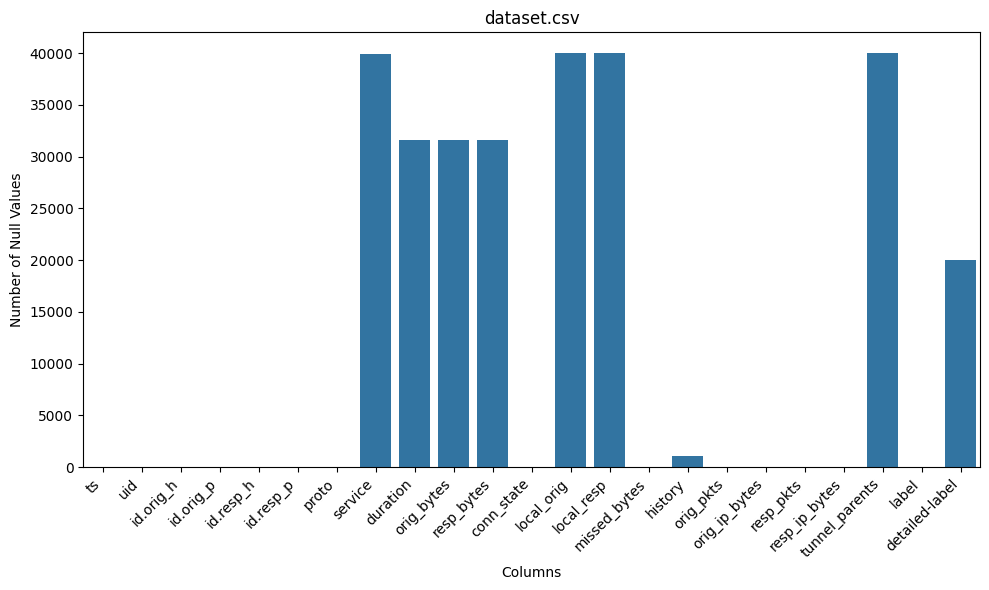

In [ ]:
#Plotting null values using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv')
plt.tight_layout()
plt.show()

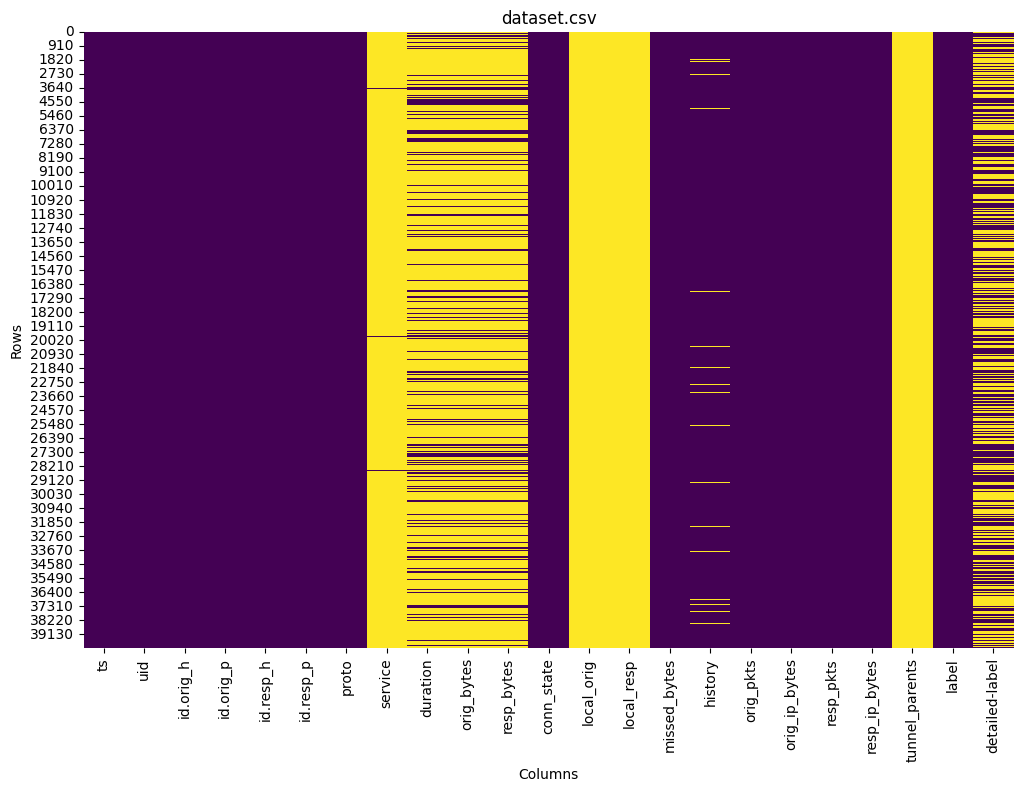

In [ ]:
# Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('dataset.csv')
plt.show()

In [ ]:
null_values = df.isnull().sum()

null_percentage = (null_values / len(df)) * 100

columns_with_null = null_percentage[null_percentage > 0]

print("Columns with Null Values (Percentage):")
print(columns_with_null)

Columns with Null Values (Percentage):
service            99.7100
duration           79.0675
orig_bytes         79.0675
resp_bytes         79.0675
local_orig        100.0000
local_resp        100.0000
history             2.8100
tunnel_parents    100.0000
detailed-label     50.0000
dtype: float64


In [ ]:
# droping columns with null values
df.drop(['service','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents'],axis=1,inplace=True)

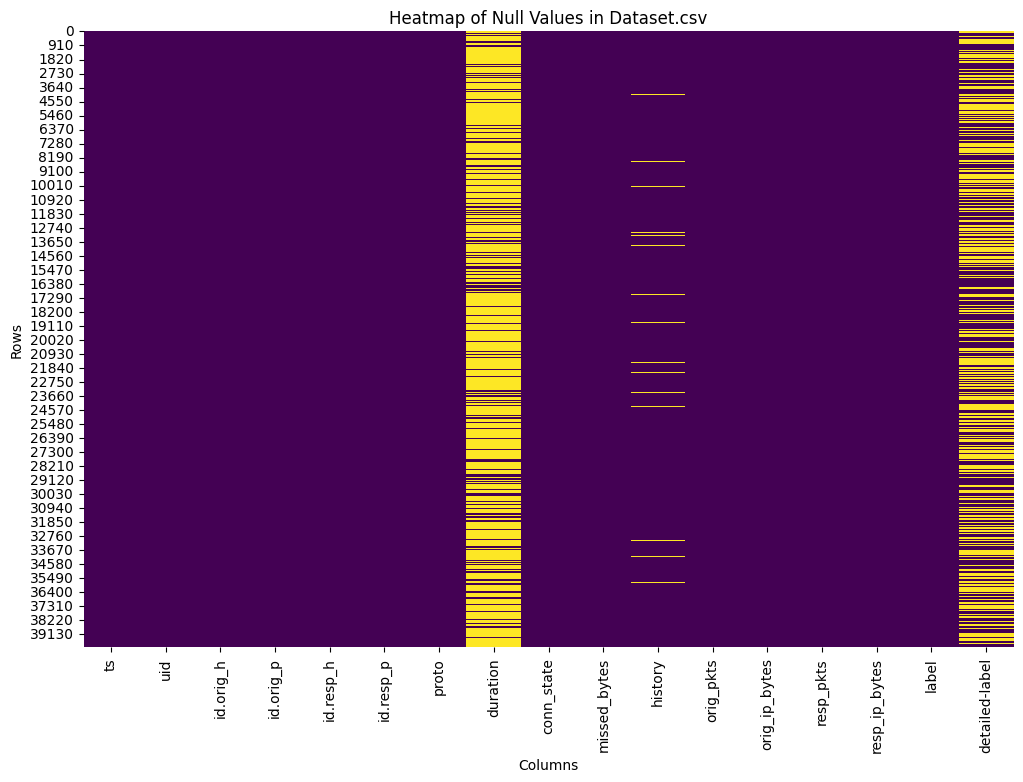

In [ ]:
#Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Dataset.csv')
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
#label encode label
df['label']= label_encoder.fit_transform(df['label'])
df.head()
df['duration'] = pd.to_numeric(df['duration'])

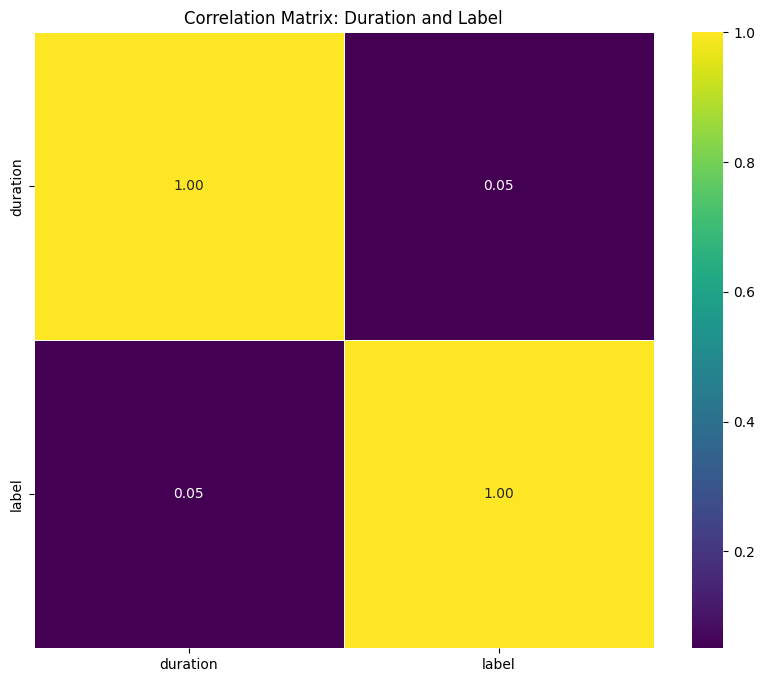

In [ ]:
selected_columns = ['duration', 'label']

# Create a DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: Duration and Label')

plt.show()

In [ ]:
df.drop(['duration'],axis=1,inplace=True)

In [ ]:
df['history'].value_counts()

history
S             21230
D             16472
Dd              448
Sr              245
ShAdDafF        146
ShAdDaFf        102
ShADadfF         62
ShADafF          24
ShAdDaFr         17
ShAdDafrR        15
R                13
ShADafr          13
ShAdDfFr         11
ShADdfFa         10
ShADar           10
ShAdDarfR        10
ShAdDr            9
ShAdDatFr         5
ShADadfR          4
^r                4
ShAdtDaFr         3
ShAr              2
ShAF              2
ShAdfFa           2
ShAdDatFrR        2
ShAdtDaFrR        2
ShAfFa            1
ShADadR           1
ShAdDaFrR         1
ShAdDafFr         1
SaR               1
ShAdDaF           1
ShAdDaTfF         1
SahAdDrfR         1
ShA               1
ShADFadfRR        1
ShAFr             1
ShADadRf          1
ShAdDaTFf         1
Name: count, dtype: int64

In [ ]:
#removing null values
df.dropna(subset=['history'], inplace=True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['history']= label_encoder.fit_transform(df['history'])
df['history'].unique()

array([ 3,  0,  1, 37, 10, 24, 27, 19, 31, 12, 30,  6,  2, 34, 20, 15, 13,
       14, 26, 32,  5,  4, 21, 29, 33, 35,  8, 16, 25, 28, 18, 23, 38, 11,
       36,  7, 17,  9, 22])

In [ ]:


df['detailed-label'].value_counts()



detailed-label
PartOfAHorizontalPortScan    19999
C&C                              1
Name: count, dtype: int64

In [ ]:
df.drop(df[df['detailed-label'] == 'C&C'].index, inplace = True)
df['detailed-label'].value_counts()

detailed-label
PartOfAHorizontalPortScan    19999
Name: count, dtype: int64

In [ ]:
df['detailed-label'].fillna('n', inplace=True)

In [ ]:
#onehot encode
onehot = pd.get_dummies(df['detailed-label'])
df = df.join(onehot)
df.head()
df.drop(['detailed-label'],axis=1,inplace=True)
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n
0,1.525949e+09,CL1EtI1IRm66D7eZxg,192.168.100.103,50575,76.55.137.180,23,tcp,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False
1,1.525886e+09,C9dDR42pJoU1b8k9Mh,192.168.100.103,43763,20.203.91.146,62332,udp,S0,0.0,0,1.0,40.0,0.0,0.0,0,False,True
2,1.525912e+09,CIOoAVi6kaEQno9Jd,192.168.100.103,60820,98.124.160.191,23,tcp,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False
3,1.525919e+09,C4HXt8keQPKlBZFLi,192.168.100.103,36772,19.208.204.79,20401,tcp,S0,0.0,3,1.0,60.0,0.0,0.0,0,False,True
4,1.525905e+09,CSTTve3W9AbRFY1nBh,192.168.100.103,38720,63.172.127.195,2323,tcp,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False


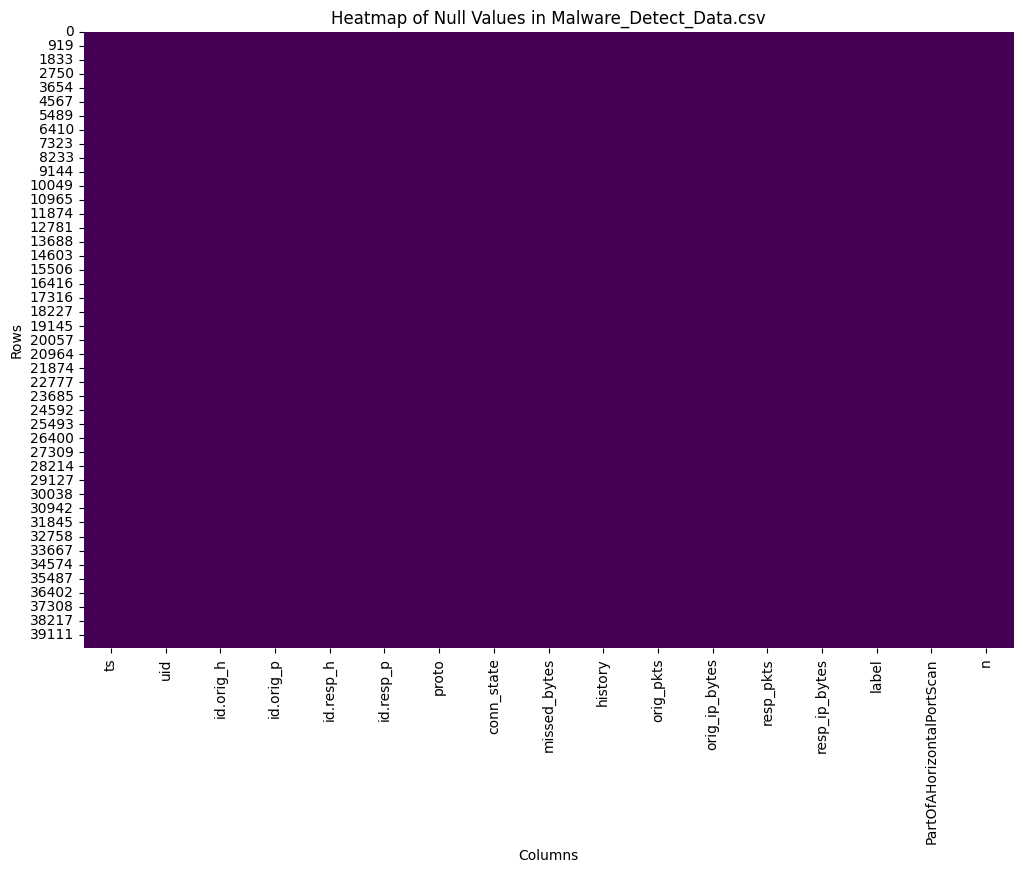

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

In [ ]:
#covert timestamp to numeric
df['ts'] = pd.to_numeric(df['ts'])
df['ts'].mean()

1525943177.202645

In [ ]:


# types of timestamp
df['uid'].value_counts()



uid
CUJeR34f8hbWE8MoLi    3
CpKjrh3mOKWf9bXrGc    3
Cp3Jbb4uBFYZOPrWg     3
CDkPwy3i7tNP3D8Z7f    3
CR7YU13gFwinaJ9Wva    3
                     ..
CnVlWv4nhVesNVk4G3    1
Cd7T1PkWYDDpSCq1d     1
C1M7xq11pKKmByAQo1    1
CRGT8g3BK22hT7dpOf    1
CCflfn4mE2xhp1Olqj    1
Name: count, Length: 36679, dtype: int64

In [ ]:
df['uid']= label_encoder.fit_transform(df['uid'])
# types of timestamp
df['uid'].value_counts()

uid
17925    3
30498    3
30346    3
8186     3
15991    3
        ..
29369    1
23150    1
788      1
16077    1
7532     1
Name: count, Length: 36679, dtype: int64

In [ ]:
df['id.orig_h'].value_counts()

id.orig_h
192.168.100.103    38862
68.244.199.86          2
70.4.148.25            2
173.115.82.143         1
108.103.113.161        1
107.30.229.120         1
173.122.135.151        1
70.13.77.186           1
173.122.109.200        1
174.159.32.247         1
70.5.46.192            1
173.150.135.177        1
Name: count, dtype: int64

In [ ]:
df['id.orig_h']= label_encoder.fit_transform(df['id.orig_h'])
# types of timestamp
df['id.orig_h'].value_counts()

id.orig_h
7     38862
8         2
10        2
2         1
1         1
0         1
4         1
9         1
3         1
6         1
11        1
5         1
Name: count, dtype: int64

In [ ]:
df['id.resp_h'].value_counts()

id.resp_h
147.231.100.5      249
213.239.154.12      81
37.187.104.44       74
89.221.214.130      73
67.208.21.230       23
                  ... 
245.109.250.251      1
249.108.152.86       1
40.155.228.29        1
62.47.202.30         1
169.60.181.216       1
Name: count, Length: 33857, dtype: int64

In [ ]:


df['id.resp_h']= label_encoder.fit_transform(df['id.resp_h'])
df['id.resp_h'].value_counts()



id.resp_h
7819     249
18688     81
23792     74
32077     73
28561     23
        ... 
21647      1
21893      1
24384      1
27832      1
11290      1
Name: count, Length: 33857, dtype: int64

In [ ]:
df['id.resp_p'].value_counts()

id.resp_p
23       10089
8080      5023
2323      3170
9527      1717
123        477
         ...  
32942        1
29116        1
51753        1
41610        1
59338        1
Name: count, Length: 14988, dtype: int64

In [ ]:


df['id.resp_p']= label_encoder.fit_transform(df['id.resp_p'])
df['id.resp_p'].value_counts()



id.resp_p
4        10089
1831      5023
506       3170
2149      1717
31         477
         ...  
7596         1
6731         1
11833        1
9558         1
13566        1
Name: count, Length: 14988, dtype: int64

In [ ]:


df['id.orig_p'].value_counts()



id.orig_p
43763    16442
123        477
34397        8
41906        8
60358        8
         ...  
45996        1
42338        1
43324        1
35803        1
37519        1
Name: count, Length: 13755, dtype: int64

In [ ]:


df['id.orig_p']= label_encoder.fit_transform(df['id.orig_p'])
df['id.orig_p'].value_counts()



id.orig_p
5355     16442
1          477
809          8
4503         8
13443        8
         ...  
6441         1
4694         1
5157         1
1480         1
2330         1
Name: count, Length: 13755, dtype: int64

In [ ]:


df['proto'].value_counts()



proto
tcp    21956
udp    16919
Name: count, dtype: int64

In [ ]:


#one hot encode proto
onehot = pd.get_dummies(df['proto'])
df = df.join(onehot)
df.head()
df.drop(['proto'],axis=1,inplace=True)
df.head()



,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
0,1.525949e+09,12473,7,8666,30039,4,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False,True,False
1,1.525886e+09,5705,7,5355,16457,14259,S0,0.0,0,1.0,40.0,0.0,0.0,0,False,True,False,True
2,1.525912e+09,10929,7,13664,33533,4,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False,True,False
3,1.525919e+09,2563,7,1966,14687,4683,S0,0.0,3,1.0,60.0,0.0,0.0,0,False,True,True,False
4,1.525905e+09,16840,7,2915,27915,506,S0,0.0,3,1.0,60.0,0.0,0.0,1,True,False,True,False


In [ ]:


df['conn_state'].value_counts()



conn_state
S0        37701
SF          810
REJ         245
RSTR         91
RSTOS0       14
RSTO          6
RSTRH         4
S2            3
S1            1
Name: count, dtype: int64

In [ ]:


#label encode conn_state
df['conn_state']= label_encoder.fit_transform(df['conn_state'])
df['conn_state'].value_counts()



conn_state
5    37701
8      810
0      245
3       91
2       14
1        6
4        4
7        3
6        1
Name: count, dtype: int64

In [ ]:
df['missed_bytes'].value_counts()

missed_bytes
0.0    38875
Name: count, dtype: int64

In [ ]:


#drop column
df.drop(['missed_bytes'],axis=1,inplace=True)



In [ ]:


df['orig_pkts'].value_counts()



orig_pkts
1.0     31267
3.0      7122
5.0        94
2.0        44
8.0        27
28.0       25
15.0       24
4.0        23
11.0       23
29.0       21
45.0       17
44.0       16
7.0        15
27.0       14
26.0       14
23.0       12
21.0       10
25.0       10
12.0       10
10.0       10
24.0       10
9.0        10
30.0        6
6.0         6
31.0        6
20.0        4
0.0         4
19.0        4
37.0        3
22.0        3
46.0        3
14.0        2
33.0        2
18.0        2
16.0        2
43.0        2
34.0        1
39.0        1
60.0        1
17.0        1
36.0        1
47.0        1
38.0        1
48.0        1
Name: count, dtype: int64

In [ ]:
df['orig_pkts'] = pd.to_numeric(df['orig_pkts'])

In [ ]:


df['orig_ip_bytes'] = pd.to_numeric(df['orig_ip_bytes'])



In [ ]:


df['resp_pkts'] = pd.to_numeric(df['resp_pkts'])



In [ ]:


df['resp_ip_bytes'] = pd.to_numeric(df['resp_ip_bytes'])



In [ ]:


df['label'].value_counts()



label
1    19999
0    18876
Name: count, dtype: int64

In [ ]:
#label encode label
df['label']= label_encoder.fit_transform(df['label'])
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
0,1.525949e+09,12473,7,8666,30039,4,5,3,1.0,60.0,0.0,0.0,1,True,False,True,False
1,1.525886e+09,5705,7,5355,16457,14259,5,0,1.0,40.0,0.0,0.0,0,False,True,False,True
2,1.525912e+09,10929,7,13664,33533,4,5,3,1.0,60.0,0.0,0.0,1,True,False,True,False
3,1.525919e+09,2563,7,1966,14687,4683,5,3,1.0,60.0,0.0,0.0,0,False,True,True,False
4,1.525905e+09,16840,7,2915,27915,506,5,3,1.0,60.0,0.0,0.0,1,True,False,True,False


In [ ]:


from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.head()
y_train.value_counts()



label
1    16000
0    15100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

# # Assuming you have X_train_scaled, y_train defined

# # Define the hyperparameter grid
#param_grid = {'C': [0.001,0.01,0.1, 1, 10], 'kernel': ['linear']}

# # Create the GridSearchCV object
#grid_search = GridSearchCV(SVC(gamma='scale'), param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
#best_params = grid_search.best_params_

# # Create a new model with the best hyperparameters
#svm_model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma='scale')
#svm_model.fit(X_train_scaled, y_train)

In [ ]:
svm_model = SVC(kernel='linear', C=0.001, gamma='scale')
svm_model.fit(X_train_scaled,y_train)

SVC(C=0.001, kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.5143408360128617
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3776
           1       0.51      1.00      0.68      3999

    accuracy                           0.51      7775
   macro avg       0.26      0.50      0.34      7775
weighted avg       0.26      0.51      0.35      7775



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
